<a href="https://colab.research.google.com/github/smackdowna/smackdowna/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is Program To classify images using Machine Leanig Algorithm

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Load Dataset
from keras.datasets import cifar10
(x_train,y_train), (x_test, y_test)  = cifar10.load_data()

170508288/170498071 [==============================] - 12s 0us/step


In [5]:
#look at the Datatypes of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [7]:
# Look At the first image from array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

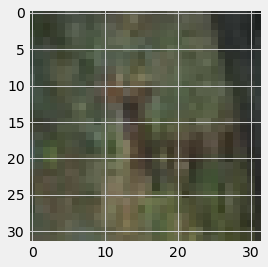

In [8]:
# Will show image as a picture
img = plt.imshow(x_train[index])

In [9]:
#Get the image Label
print('The image label is', y_train[index])

The image label is [4]


In [10]:
# Get the image classification 
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck' ]
#Print image class
print('the Image class is:', classification[y_train[index][0]])

the Image class is: deer


In [11]:
#convert the labels to set of 10 number to input into the  neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
#print the new labels
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# print the label of new image above
print('The Hot label is :', y_train_one_hot[index])

The Hot label is : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
#Noramlize the pixels values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [16]:
#create Model Architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32, 32,3)))

#Add a Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu'))

#Add another Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add A dropout layer
model.add(Dropout(0.5))


#Add A layer with 500 neurons 
model.add(Dense(500, activation='relu'))

#Add A dropout layer
model.add(Dropout(0.5))

#Add A layer with 250 neurons 
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [17]:
#compile the model
model.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam',
                        metrics = ['accuracy'])

In [18]:
#Train the model
hist = model.fit(x_train,y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 68s 337ms/step - loss: 2.0183 - accuracy: 0.2307 - val_loss: 1.4613 - val_accuracy: 0.4652
Epoch 2/10
157/157 [==============================] - 52s 333ms/step - loss: 1.4850 - accuracy: 0.4523 - val_loss: 1.3606 - val_accuracy: 0.5091
Epoch 3/10
157/157 [==============================] - 52s 332ms/step - loss: 1.3039 - accuracy: 0.5313 - val_loss: 1.1934 - val_accuracy: 0.5731
Epoch 4/10
157/157 [==============================] - 52s 332ms/step - loss: 1.1820 - accuracy: 0.5761 - val_loss: 1.2626 - val_accuracy: 0.5721
Epoch 5/10
157/157 [==============================] - 52s 332ms/step - loss: 1.1293 - accuracy: 0.5933 - val_loss: 1.1245 - val_accuracy: 0.5996
Epoch 6/10
157/157 [==============================] - 55s 350ms/step - loss: 1.0314 - accuracy: 0.6324 - val_loss: 1.0772 - val_accuracy: 0.6223
Epoch 7/10
157/157 [==============================] - 52s 333ms/step - loss: 0.9701 - accuracy: 0.6524 - val_loss: 1.0011 - val_ac

In [19]:
#Evaluate the model using test Data Set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 14ms/step - loss: 0.9437 - accuracy: 0.6710


0.6710000038146973

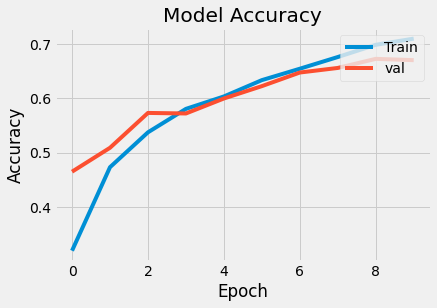

In [20]:
#Visualize Model Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

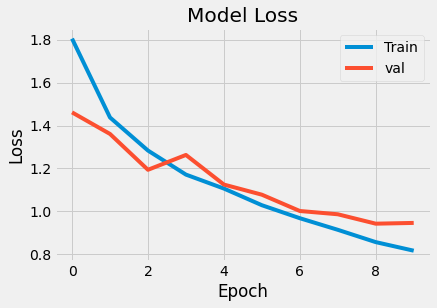

In [21]:
#Visualize Model Accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [22]:
#Test The model with example
from google.colab import files
uploaded = files.upload()

Saving car.jpg to car.jpg


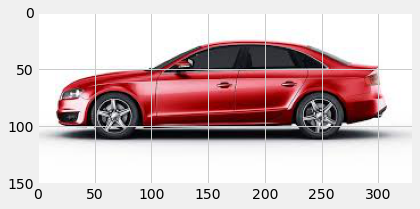

In [23]:
#show the image 
new_image =  plt.imread('car.jpg')
img = plt.imshow(new_image)

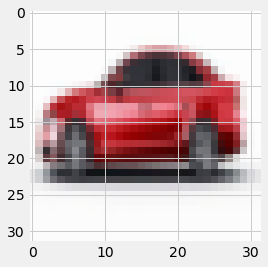

In [24]:
#resize the image 
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [25]:
#Get the model predictions
predictions = model.predict(np.array([resized_image]))
#show the predictions
predictions

array([[1.0614820e-06, 9.8880553e-01, 1.6308256e-10, 2.3266802e-10,
        4.3735753e-13, 7.2698466e-12, 1.1833416e-11, 1.3221641e-11,
        5.1414871e-05, 1.1141968e-02]], dtype=float32)

In [26]:
#sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x= predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i]=list_index[j]
      list_index[j]= temp



#show the sorted labels in order
print(list_index)

[1, 9, 8, 0, 3, 2, 7, 6, 5, 4]


In [27]:
#print the first 5 predictions
for i in range (5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2 ), '%')

automobile : 98.88 %
truck : 1.11 %
ship : 0.01 %
airplane : 0.0 %
cat : 0.0 %
